In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
car_plate = cv2.imread('../Computer-Vision-with-Python/DATA/car_plate.jpg')
car_plate = cv2.cvtColor(car_plate,cv2.COLOR_BGR2RGB)

In [32]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

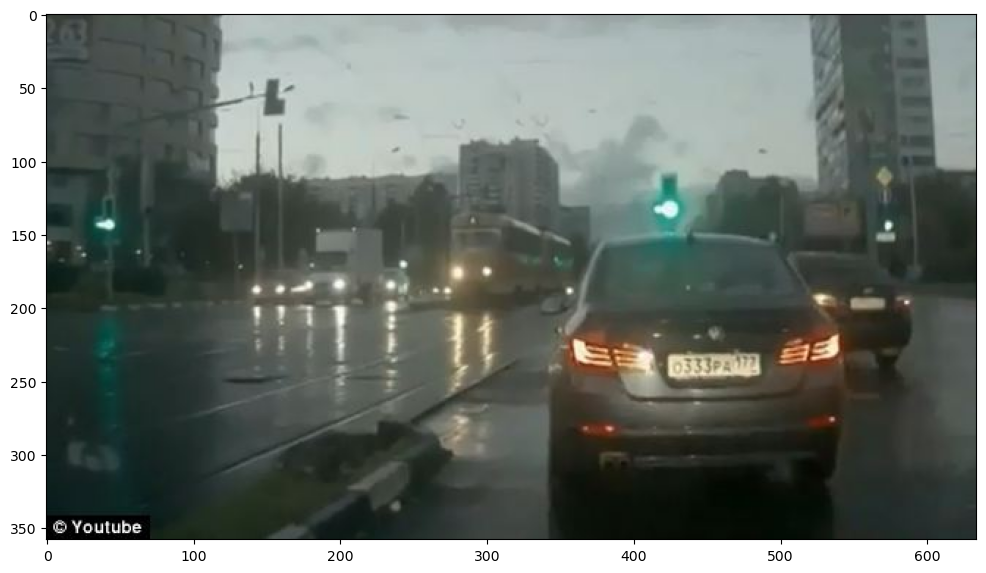

In [33]:
display(car_plate)

In [34]:
plate_number_cascade = cv2.CascadeClassifier('../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [35]:
def detect_plate(img):
    rpn_img = img.copy()
    rpn_rects = plate_number_cascade.detectMultiScale(rpn_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in rpn_rects:
        cv2.rectangle(rpn_img,(x,y),(x+w,y+h),(255,0,0),3)
    return rpn_img

In [36]:
result = detect_plate(car_plate)

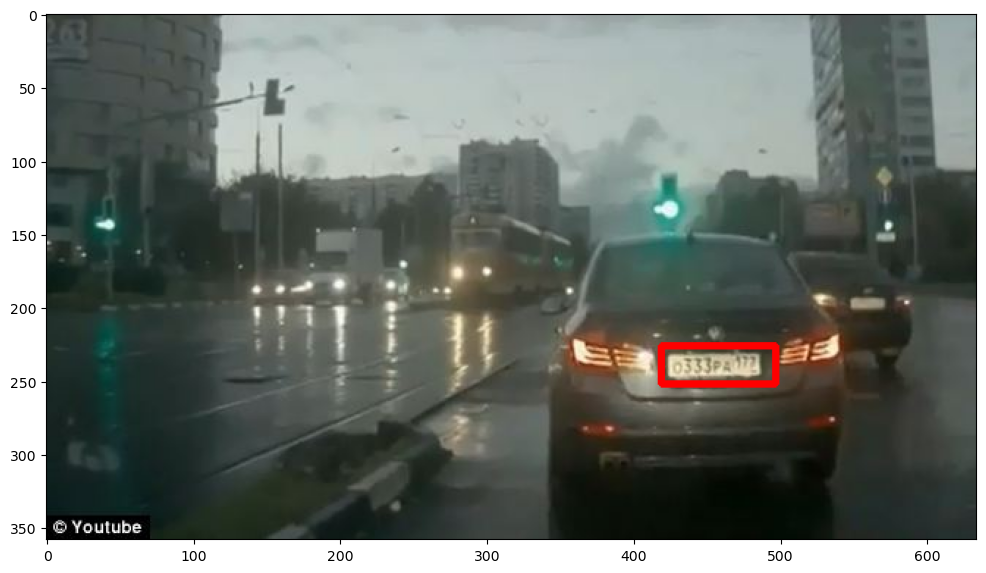

In [37]:
display(result)

In [38]:
def detect_and_blur_plate(img):
    rpn_img = img.copy()
    rpn_rects = plate_number_cascade.detectMultiScale(rpn_img, scaleFactor=1.3, minNeighbors=3)
    for (x, y, w, h) in rpn_rects:
        roi = rpn_img[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 15)
        rpn_img[y:y+h, x:x+w] = blurred_roi
    return rpn_img

In [39]:
result = detect_and_blur_plate(car_plate)

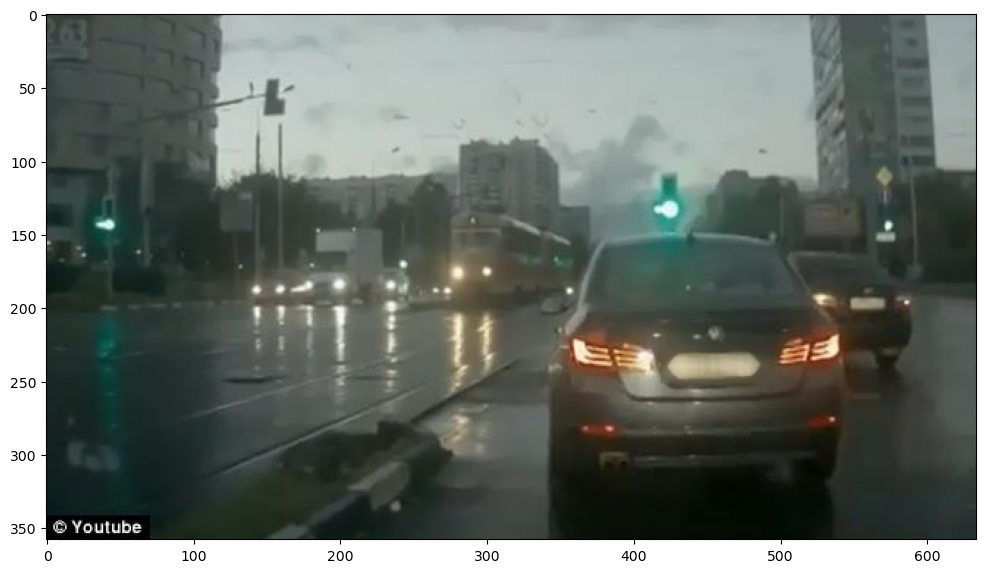

In [40]:
display(result)